# Inverse Kinematics (2D)

In [1]:
%matplotlib notebook
from matplotlib import pylab as plt
from numpy import sin, cos, pi, matrix, random, linalg, asarray
from __future__ import division
from math import atan2
from IPython import display
from ipywidgets import interact, fixed

## Coordinate Transformation

In [2]:
def trans(x, y, a):
    '''create a 2D transformation'''
    s = sin(a)
    c = cos(a)
    return matrix([[c, -s, x],
                   [s,  c, y],
                   [0,  0, 1]])

def from_trans(m):
    '''get x, y, theta from transform matrix'''
    return [m[0, -1], m[1, -1], atan2(m[1, 0], m[0, 0])]

In [3]:
trans(0, 0, 0)

matrix([[ 1., -0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

## Parameters of robot arm

In [4]:
l = [0, 3, 2, 1]
#l = [0, 3, 2, 1, 1]
#l = [0, 3, 2, 1, 1, 1]
l = [1] * 30
N = len(l) - 1  # number of links
max_len = sum(l)
a = random.random_sample(N)  # angles of joints
T0 = trans(0, 0, 0)  # base

## Forward Kinematics

In [5]:
def forward_kinematics(T0, l, a):
    T = [T0]
    for i in range(len(a)):
        Ti = T[-1] * trans(l[i], 0, a[i])
        T.append(Ti)
    Te = T[-1] * trans(l[-1], 0, 0)  # end effector
    T.append(Te)
    return T

In [6]:
def show_robot_arm(T):
    plt.cla()
    x = [Ti[0,-1] for Ti in T]
    y = [Ti[1,-1] for Ti in T]
    plt.plot(x, y, '-or', linewidth=5, markersize=10)
    plt.plot(x[-1], y[-1], 'og', linewidth=5, markersize=10)
    plt.xlim([-max_len, max_len])
    plt.ylim([-max_len, max_len]) 
    ax = plt.axes()
    ax.set_aspect('equal')
    t = atan2(T[-1][1, 0], T[-1][0,0])
    ax.annotate('[%.2f,%.2f,%.2f]' % (x[-1], y[-1], t), xy=(x[-1], y[-1]), xytext=(x[-1], y[-1] + 0.5))
    plt.show
    return ax

## Inverse Kinematics

### Numerical Solution: optimzation approach

<IPython.core.display.Javascript object>


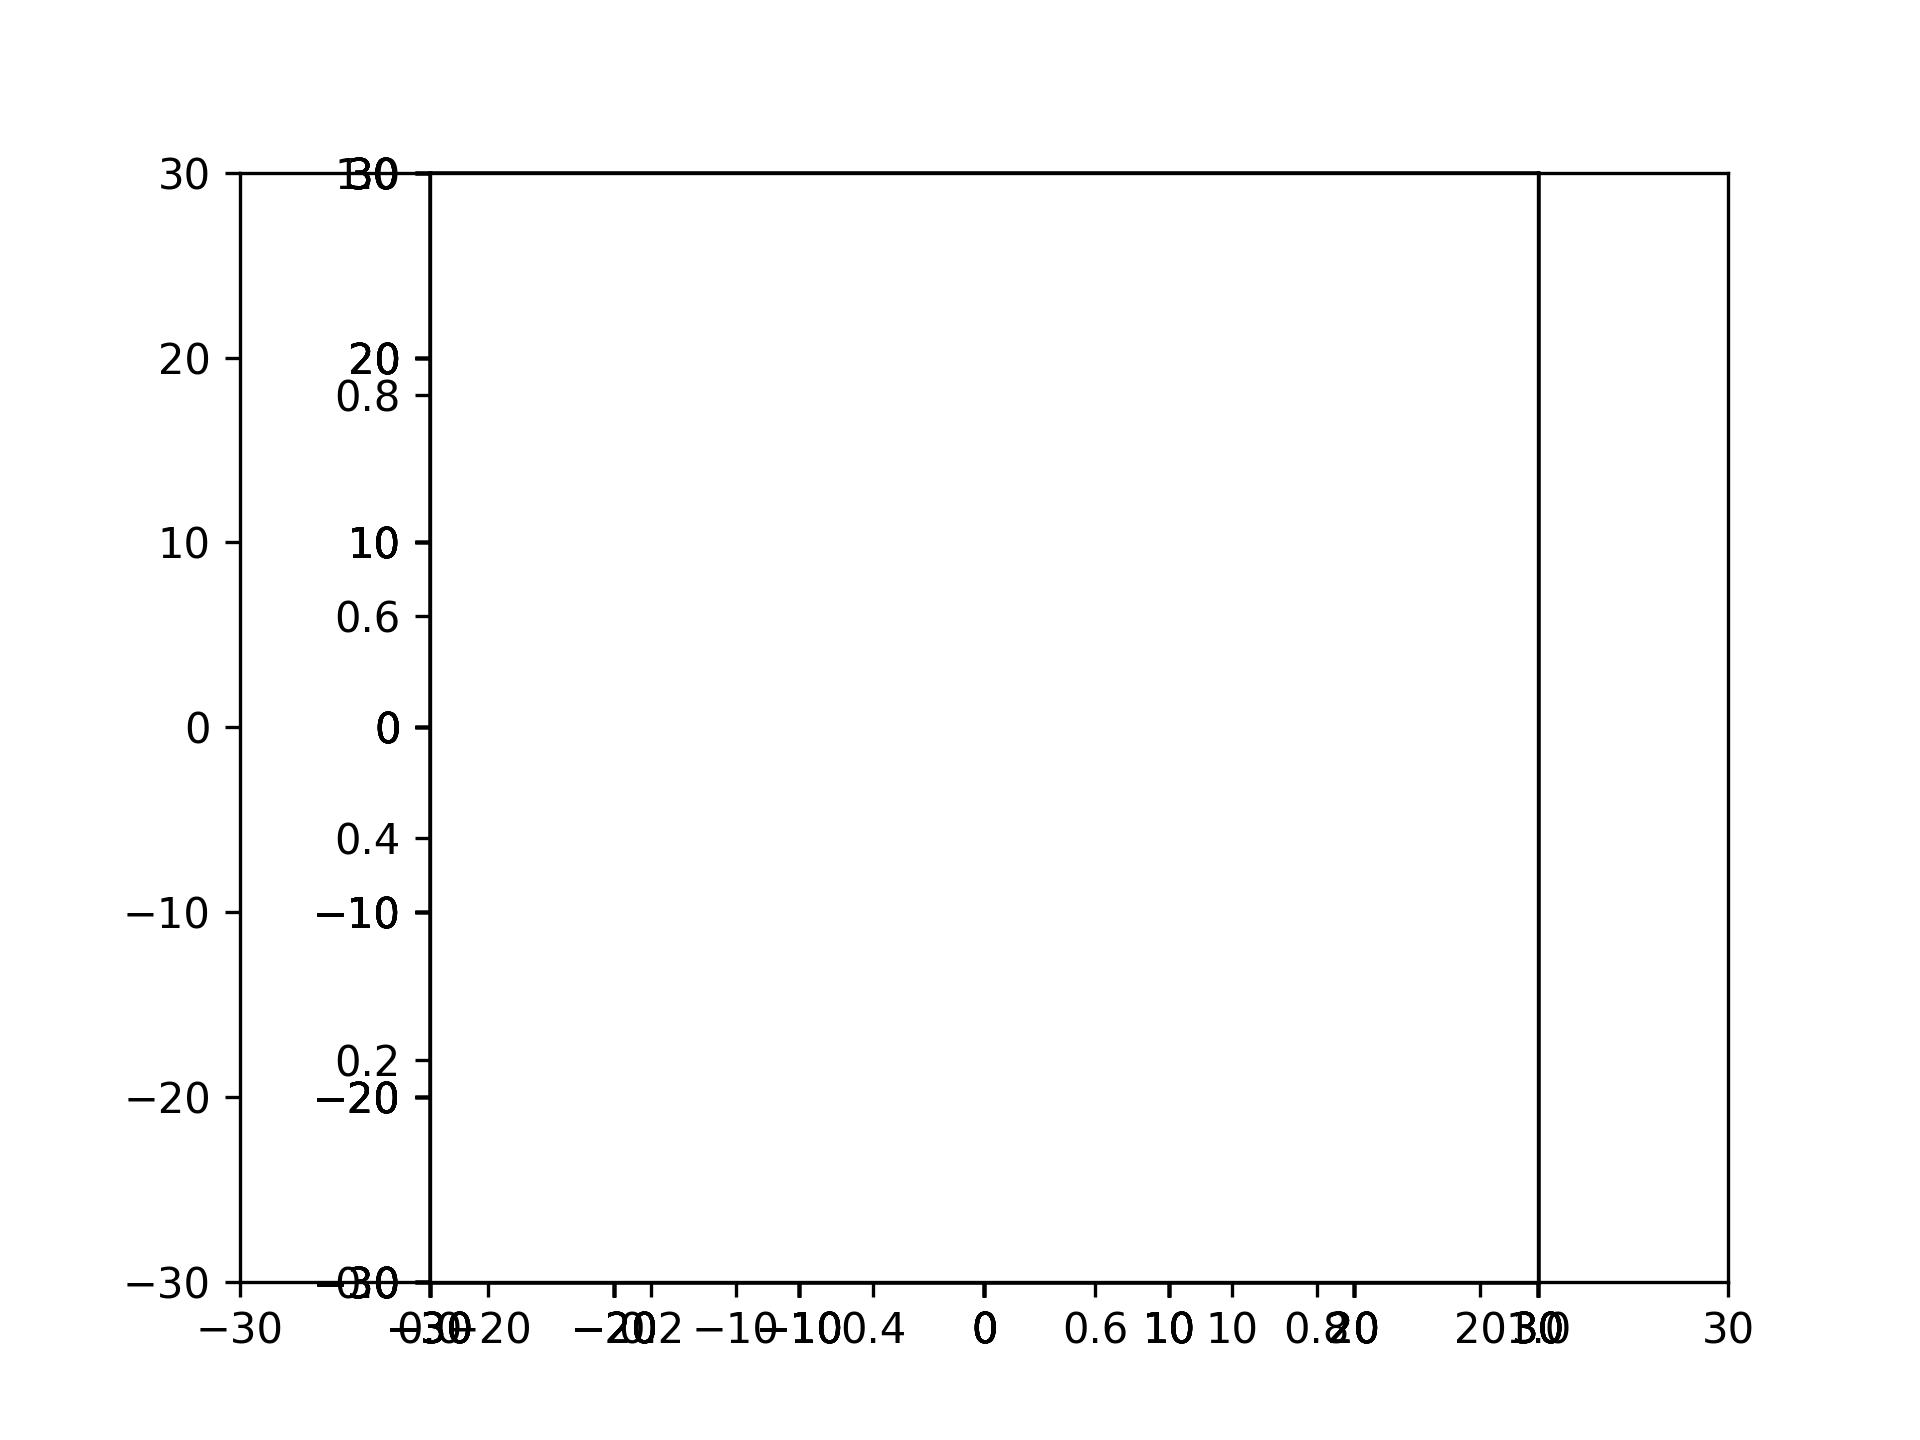

interactive(children=(FloatSlider(value=0.0, description='x_e', max=30.0, step=0.01), FloatSlider(value=4.6112…

In [7]:
from scipy.optimize import fmin

def error_func(theta, target):
    Ts = forward_kinematics(T0, l, theta)
    Te = matrix([from_trans(Ts[-1])]).T
    e = target - Te
    return linalg.norm(e)

theta = random.random(N)
def inverse_kinematics(x_e, y_e, theta_e, theta):
    target = matrix([[x_e, y_e, theta_e]]).T
    func = lambda t: error_func(t, target)
    return fmin(func, theta)

T = forward_kinematics(T0, l, theta)
show_robot_arm(T)
Te = matrix([from_trans(T[-1])])

@interact(x_e=(0, max_len, 0.01), y_e=(-max_len, max_len, 0.01), theta_e=(-pi, pi, 0.01), theta=fixed(theta))
def set_end_effector(x_e=Te[0,0], y_e=Te[0,1], theta_e=Te[0,2], theta=theta):
    theta = inverse_kinematics(x_e, y_e, theta_e, theta)
    T = forward_kinematics(T0, l, theta)
    show_robot_arm(T)
    return theta
